## plotting figures and some stats for the neanderthal predixcan manuscript

<a id='Contents'></a>
### Contents

- [DR Gene Counts](#drcounts)
- [Raw Expression Comparison](#expcomp)
- [DR Odds Ratio](#dror)
- [Phenotype Counts](#phenocounts)
- [Phenotype OR](#phenoor)
- [Der. SNP Count](#dersnpcount)
- [GO Term Plot](#goplot)
- [Desert Gene Plot](#desertplot)
- [1kG Distribution Plots](#1kgdist)
- [Neanderthal Correlations](#neancorr)
- [Tissue/DR Gene Correlation](#tisscorr)


#### load libraries, standard info

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
#library(fmsb)
library(PheWAS)
#library(karyoploteR)
library(knitr)

abbreviations <- c("ADPS","ESPMC","ABPV","ESPMS","ADRNLG","HRTAA","BRNACC","HRTLV","ARTA","LIVER","ARTC","LUNG","ARTT","MSCSK","BRNCDT","NERVET","BRNCHB","OVARY",
                   "BRNCHA","PNCS","BRNCTX","PTTY","BRNFCTX","PRSTT","BRNHPP","SKINNS","BRNHPT","SKINS","BRNNCC","SMINT","BRNPTM","SPLEEN","BREAST","STMCH","TESTIS",
                   "FIBS","THYROID","CLNS","UTERUS","CLNT","VAGINA","ESPGJ","WHLBLD")
names(abbreviations) <- c("adipose_subcutaneous","esophagus_mucosa","adipose_visceral_omentum","esophagus_muscularis",
        "adrenal_gland","heart_atrial_appendage","anterior_cingulate_cortex","left_ventricle","artery_aorta","liver","artery_coronary",
        "lung","artery_tibial","muscle_skeletal","brain_caudate_basal_ganglia","nerve_tibial","brain_cerebellar_hemisphere","ovary",                                
        "brain_cerebellum","pancreas","brain_cortex","pituitary","brain_frontal_cortex","prostate","brain_hippocampus","skin_nosun_suprapubic","brain_hypothalamus",
        "skin_sun_lower_leg","brain_nucleus_accumbens_basal_ganglia","small_intestine_terminal_ileum","brain_putamen_basal_ganglia",
        "spleen","breast_mammary_tissue","stomach","testis","cells_transformed_fibroblasts","thyroid","colon_sigmoid","uterus",
        "colon_transverse","vagina","esophagus_gastroesophageal_junction","whole_blood")



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: parallel


<a id='drcounts'></a>
#### plot counts of DR genes per tissue, filtered for Non-Introgressed genes

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  X1 = col_character()
)
Joining, by = "gene_id"


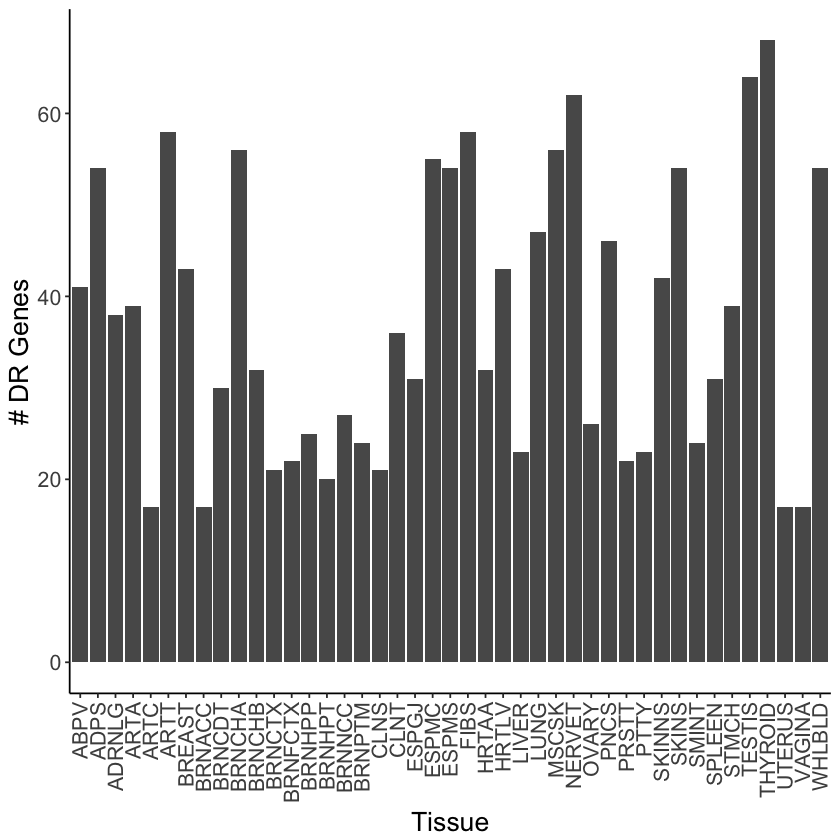

In [4]:
p_file_path <- "data/altai_original_pvalues_2sided.txt"
intro_path <- "data/altai_intro_genes.txt"

p_mat <- read_delim(p_file_path, "\t", escape_double = FALSE, trim_ws = TRUE)
intro <- read_csv(intro_path, col_names = FALSE)
intro$gene_id <- intro$X1
intro$X1 <- NULL
p_mat <- anti_join(p_mat, intro)
counts <- c()
tiss <- c()
for (i in 2:ncol(p_mat)) {
tiss <- c(tiss, names(p_mat[i]))
counts <- c(counts,nrow(p_mat[!is.na(p_mat[,i]) & p_mat[,i] == 0,]))
}
out <- data.frame(num = counts, Tissue = tiss)
for (i in 1:nrow(out)) {
out$abb[i] <- abbreviations[as.character(out$Tissue[i])]
}
ggplot(out, aes(x = abb, y = num)) + geom_bar(stat="identity") + labs(x="Tissue",y="# DR Genes") + 
theme_classic() + theme(text = element_text(size=16), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
ggsave('dr_gene_counts.pdf', width=7, height= 5) 

***
[Contents](#Contents)

<a id='expcomp'></a>
#### raw expression comparisons for non-introgressed genes based on introgression status

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Joining, by = "X1"
Warning message:
"Column `X1` joining factor and character vector, coercing into character vector"Joining, by = "X1"
Joining, by = "X1"
Joining, by = "X1"
Joining, by = "gene_id"
Joining, by = "gene_id"
Warning message:
"Column `gene_id` joining character vector and factor, coercing into character vector"

[1] "Desert Mean:"

[1] 0.0002551554

[1] "Desert Max:"

[1] 0.006554611

[1] "Desert Min:"

[1] 0.05430711

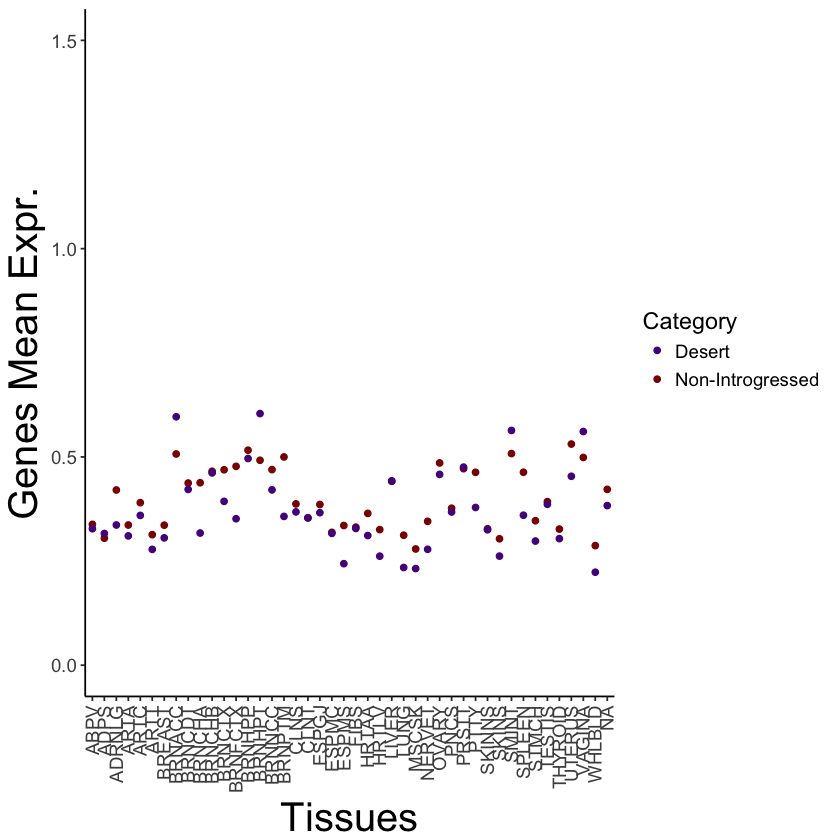

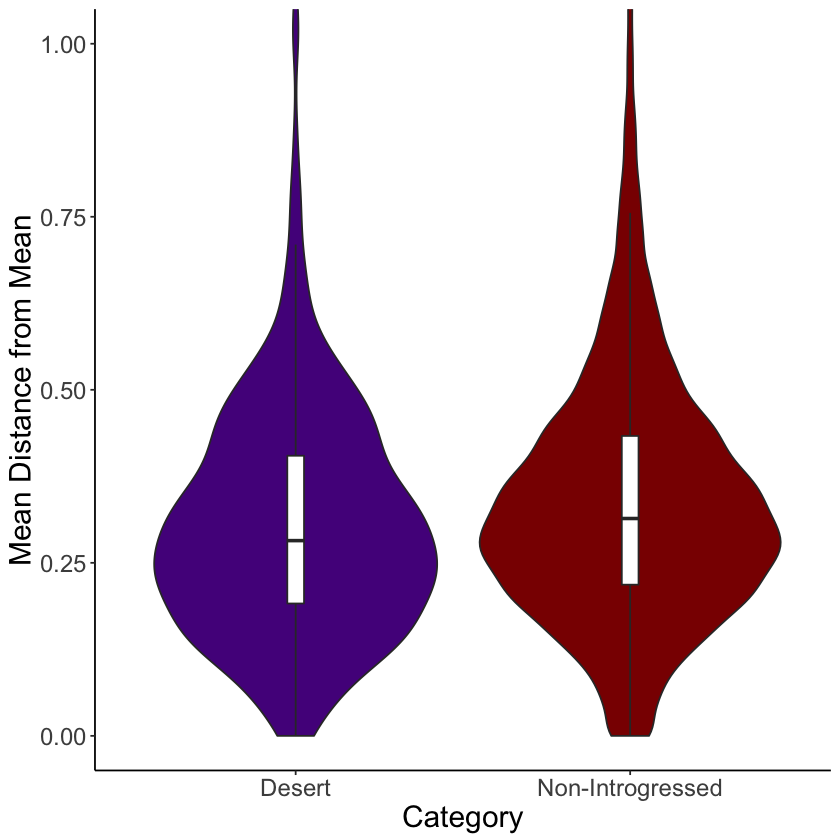

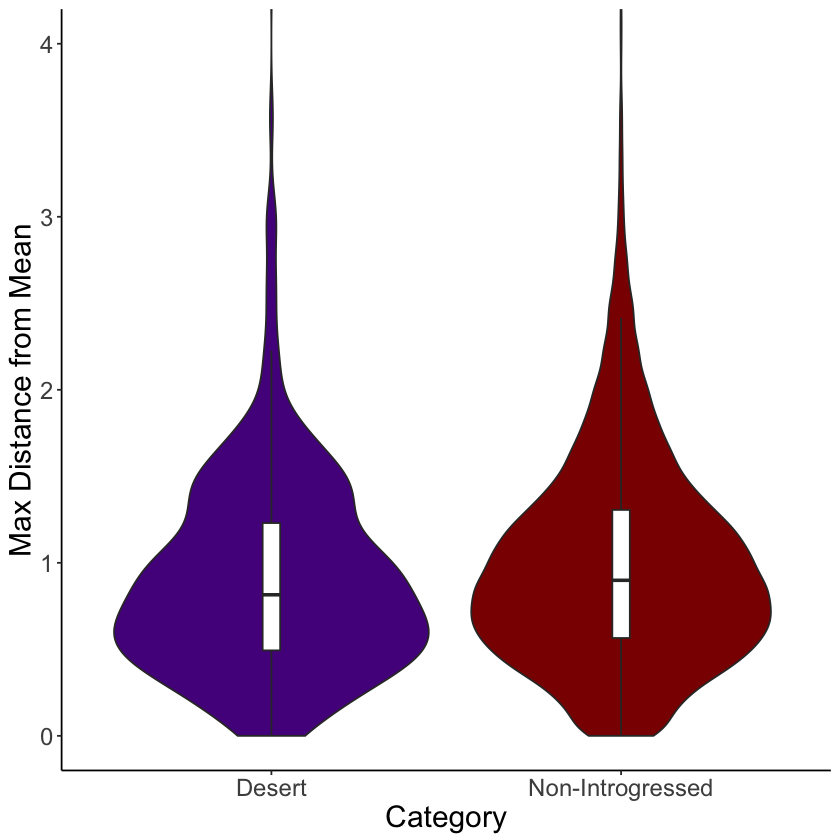

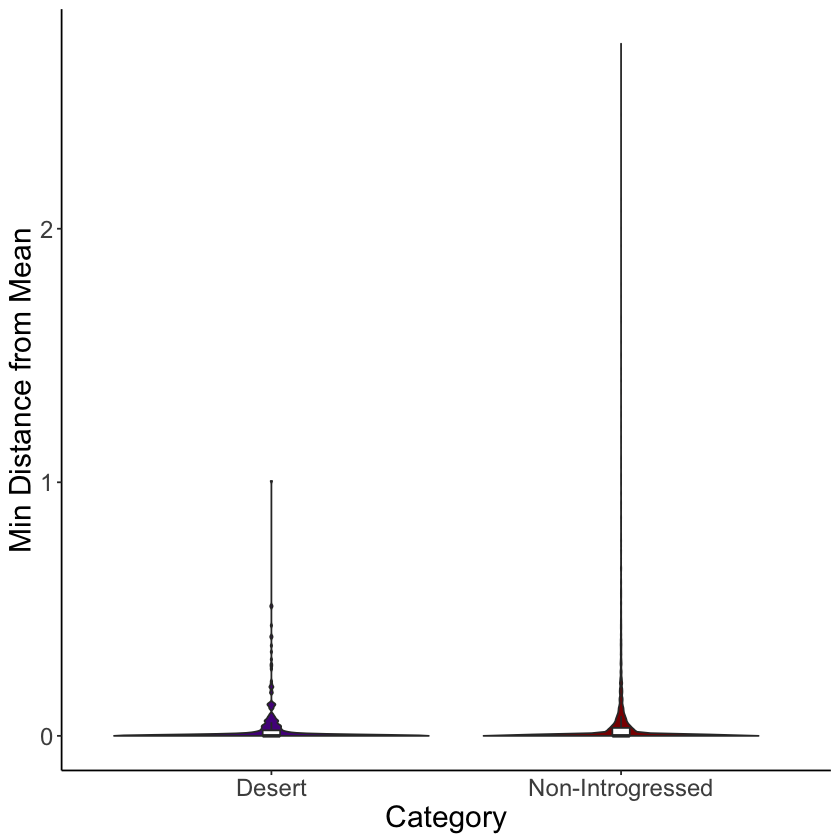

In [7]:
desert_file <- "data/altai_desert_genes.txt"
intro_file <- "data/altai_intro_genes.txt"
excl_file <- "data/altai_original_missingModels.txt"
pred_file <- "data/altai_original_predExp.txt"

desert_genes <- read_delim(desert_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
intro_genes <- read_delim(intro_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
excl_genes <- read_delim(excl_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
altai_all <- read_delim(pred_file, "\t", escape_double = FALSE, trim_ws = TRUE)

for (i in 1:nrow(intro_genes)) {
    intro_genes[i,1] <- strsplit(intro_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(desert_genes)) {
    desert_genes[i,1] <- strsplit(desert_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(altai_all)) {
    altai_all[i,1] <- strsplit(altai_all[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(excl_genes)) {
    excl_genes[i,1] <- strsplit(excl_genes[i,1][[1]],"[.]")[[1]][1]
}

all_genes <- data.frame(X1 =altai_all$gene_id)
all_genes <- anti_join(all_genes,excl_genes)
desert_genes <- anti_join(desert_genes,excl_genes)
intro_genes <- anti_join(intro_genes,excl_genes)
desert_genes <- anti_join(desert_genes,intro_genes)

rows_to_remove <- c()
for (i in 1:nrow(all_genes)) {
    if (all_genes$X1[i] %in% desert_genes$X1 || all_genes$X1[i] %in% intro_genes$X1) {
      rows_to_remove <- c(rows_to_remove,i)
    }
}
control_genes <- data.frame(gene_id = all_genes[-rows_to_remove,])
desert_genes$gene_id <- desert_genes$X1
desert_genes$X1 <- NULL
remove(all_genes)

altai_all$count <- ncol(altai_all)-1
altai_all$mean <-  0
altai_all$max <- 0
altai_all$min <- 100
for (i in 2:(ncol(altai_all)-4)) {
    for (j in 1:nrow(altai_all)) {
      if (is.na(altai_all[j,i])) {
        altai_all$count[j] <- altai_all$count[j] -1
      } else {
        altai_all$mean[j] <- altai_all$mean[j] + abs(altai_all[j,i][[1]])
        if (abs(altai_all[j,i][[1]]) > altai_all$max[j]) { altai_all$max[j] <- abs(altai_all[j,i][[1]])}
        if (abs(altai_all[j,i][[1]])< altai_all$min[j]) {altai_all$min[j] <- abs(altai_all[j,i][[1]])}
      }
    }
}
altai_all$mean <- altai_all$mean/altai_all$count
altai_all$count <- NULL
desert_genes <- inner_join(altai_all,desert_genes)
control_genes <- inner_join(altai_all,control_genes)
remove(altai_all)

p_desert <- c()
mean_desert <- c()
mean_control <- c()
n <- c()
for (col in 2:(ncol(control_genes)-3)) {
    tmp <- data.frame(Expression = c(control_genes[,col][[1]],desert_genes[,col][[1]]),
                      Category = c(rep("Non-Introgressed",nrow(control_genes)), rep("Desert", nrow(desert_genes))))
    n <- c(n,names(control_genes)[col])
    #print(names(control_genes)[col])
    #print("Non-Intro Mean = ")
    #print(mean(abs(tmp[tmp$Category == "Non-Intro",]$Expression), na.rm = T))
    mean_control <- c(mean_control,mean(abs(tmp[tmp$Category == "Non-Introgressed",]$Expression), na.rm = T))
    new <- wilcox.test(abs(tmp[tmp$Category == "Desert",]$Expression), abs(tmp[tmp$Category == "Non-Introgressed",]$Expression))$p.value
    p_desert <- c(p_desert,new)
    #print("Desert mean = ")
    #print(mean(abs(tmp[tmp$Category == "Desert",]$Expression), na.rm = T))
    mean_desert <- c(mean_desert,mean(abs(tmp[tmp$Category == "Desert",]$Expression), na.rm = T))
    #print("p = ")
    #print(new)
}
remove(tmp)
p_values <- data.frame(Tissue = n,control_mean = mean_control,desert_mean = mean_desert,desert_p = p_desert)
p_values <- p_values[order(p_values$desert_p),]
p_values$desert_fdr <- "FAIL"
for (i in 1:nrow(p_values)) {
    p_values$desert_q[i] <- i*0.05/nrow(p_values)
    if (p_values$desert_p[i] < p_values$desert_q[i]) {p_values$desert_fdr[i] <- "PASS"}
}

means <- data.frame(tissue = rep(p_values$Tissue,2), mean = c(p_values$control_mean,p_values$desert_mean),
                  Category = c(rep("Non-Introgressed",nrow(p_values)), rep("Desert", nrow(p_values))))
for (i in 1:nrow(means)) {
    means$abb[i] <- abbreviations[as.character(means$tissue[i])]
}
ggplot(means,aes(x=abb,y=mean,color=Category)) + geom_point() + ylim(0,1.5) + theme_classic() + 
scale_colour_manual(values=c("purple4","darkred"))+
labs(x="Tissues",y="Genes Mean Expr.") + theme(text = element_text(size=14),axis.title.x= element_text(size = 24),axis.text.x=element_text(angle = 90,
                                                                                                  vjust = 0.5, hjust=1),axis.title.y=element_text(size = 24))

plots <- data.frame(Mean = c(control_genes$mean,desert_genes$mean), Max = c(control_genes$max,desert_genes$max),
                  Min = c(control_genes$min,desert_genes$min),
                  Category = c(rep("Non-Introgressed",nrow(control_genes)), rep("Desert", nrow(desert_genes))))

"Desert Mean:"
wilcox.test(plots[plots$Category == "Desert",]$Mean,plots[plots$Category == "Non-Introgressed",]$Mean)$p.value
"Desert Max:"
wilcox.test(plots[plots$Category == "Desert",]$Max,plots[plots$Category == "Non-Introgressed",]$Max)$p.value
"Desert Min:"
wilcox.test(plots[plots$Category == "Desert",]$Min,plots[plots$Category == "Non-Introgressed",]$Min)$p.value
ggplot(plots,aes(x=Category,y=Mean,fill=Category)) + geom_violin()+ geom_boxplot(width=0.05,fill="white",outlier.shape=NA) + 
    theme_classic() + scale_fill_manual(values=c("purple4","darkred"))+coord_cartesian(ylim=c(0,1))+
    labs(y="Mean Distance from Mean") + theme(text = element_text(size=18),legend.position = "none")##considering anything >1 as outlier
ggsave('mean_expr.pdf', width=6, height= 4) 
ggplot(plots,aes(x=Category,y=Max,fill=Category)) + geom_violin()+ geom_boxplot(width=0.05,fill="white",outlier.shape=NA) + 
    theme_classic() + scale_fill_manual(values=c("purple4","darkred"))+ coord_cartesian(ylim=c(0,4))+
    labs(y="Max Distance from Mean") +theme(text = element_text(size=18),legend.position = "none")##considering anything >4 as outlier
ggsave('max_expr.pdf', width=6, height= 4) 
ggplot(plots,aes(x=Category,y=Min,fill=Category)) + geom_violin()+ geom_boxplot(width=0.05,fill="white",outlier.shape=NA) + 
    theme_classic() + scale_fill_manual(values=c("purple4","darkred"))+
    labs(y="Min Distance from Mean") +theme(text = element_text(size=18),legend.position = "none")
ggsave('min_expr.pdf', width=6, height= 4) 

***
[Contents](#Contents)

<a id='dror'></a>
#### DR Odds ratio

In [7]:
desert_file <- "../data/altai_desert_genes.txt"
intro_file <- "../data/altai_intro_genes.txt"
excl_file <- "../data/altai_original_missingModels.txt"
pred_file <- "../data/altai_original_pvalues_2sided.txt"

desert_genes <- read_delim(desert_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
intro_genes <- read_delim(intro_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
excl_genes <- read_delim(excl_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
altai_all <- read_delim(pred_file, "\t", escape_double = FALSE, trim_ws = TRUE)

for (i in 1:nrow(intro_genes)) {
    intro_genes[i,1] <- strsplit(intro_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(desert_genes)) {
    desert_genes[i,1] <- strsplit(desert_genes[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(altai_all)) {
    altai_all[i,1] <- strsplit(altai_all[i,1][[1]],"[.]")[[1]][1]
}
for (i in 1:nrow(excl_genes)) {
    excl_genes[i,1] <- strsplit(excl_genes[i,1][[1]],"[.]")[[1]][1]
}

all_genes <- data.frame(X1 =altai_all$gene_id)
all_genes <- anti_join(all_genes,excl_genes)
desert_genes <- anti_join(desert_genes,excl_genes)
intro_genes <- anti_join(intro_genes,excl_genes)
desert_genes <- anti_join(desert_genes,intro_genes)

rows_to_remove <- c()
for (i in 1:nrow(all_genes)) {
    if (all_genes$X1[i] %in% desert_genes$X1 || all_genes$X1[i] %in% intro_genes$X1) {
      rows_to_remove <- c(rows_to_remove,i)
    }
}
control_genes <- data.frame(gene_id = all_genes[-rows_to_remove,])
desert_genes$gene_id <- desert_genes$X1
desert_genes$X1 <- NULL
remove(all_genes)

desert_genes <- inner_join(altai_all,desert_genes)
control_genes <- inner_join(altai_all,control_genes)

des_DR <- 0
cont_DR <- 0

# counting the genes in each category that are DR in any tissue
for (i in 1:(nrow(control_genes))) {
    if (0.0 %in% desert_genes[i,]) {
        des_DR <- des_DR + 1
    }
    if (0.0 %in% control_genes[i,]) {
        cont_DR <- cont_DR + 1
    }
}

des_norm <- nrow(desert_genes) - des_DR
cont_norm <- nrow(control_genes) - cont_DR

or <- oddsratio(des_DR,cont_DR,des_norm,cont_norm)
or

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Joining, by = "X1"
Warning message:
"Column `X1` joining factor and character vector, coercing into character vector"Joining, by = "X1"
Joining, by = "X1"
Joining, by = "X1"
Joining, by = "gene_id"
Joining, by = "gene_id"
Warning message:
"Column `gene_id` joining character vector and factor, coercing into character vector"

           Disease Nondisease Total
Exposed         27        313   340
Nonexposed    1305      11453 12758
Total         1332      11766 13098



	Odds ratio estimate and its significance probability

data:  des_DR cont_DR des_norm cont_norm
p-value = 0.1684
95 percent confidence interval:
 0.5088542 1.1263232
sample estimates:
[1] 0.7570563


Category,DRStatus,perc
Desert,DR,0.07941176
GWARR,DR,0.10228876
Desert,Non-DR,0.92058824
GWARR,Non-DR,0.89771124


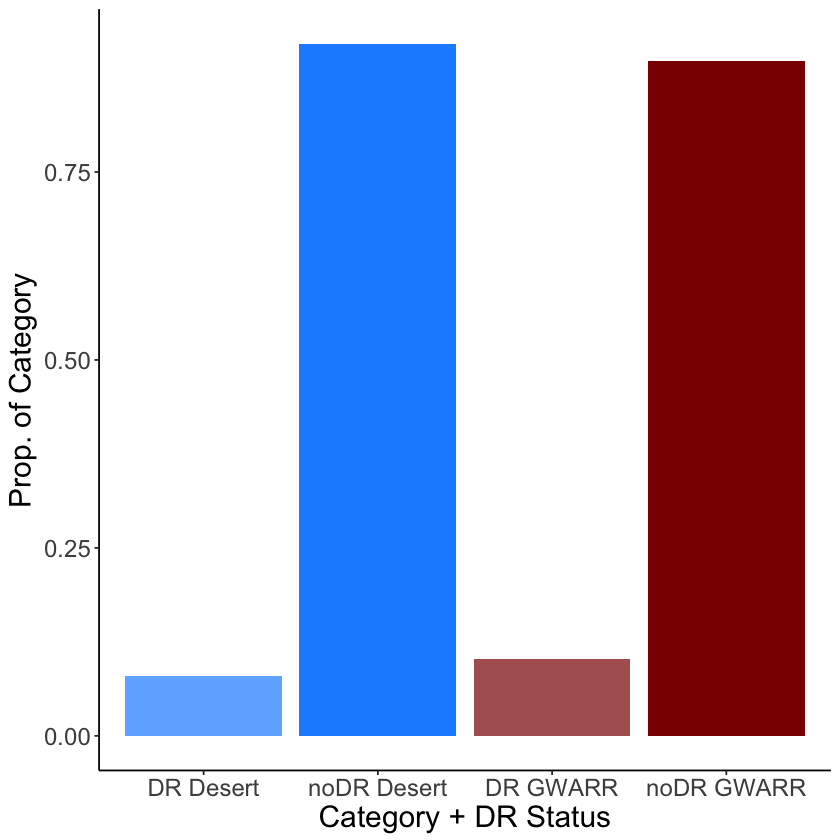

In [8]:
d <- data.frame(Category = c("Desert","GWARR","Desert","GWARR"),
                DRStatus = c("DR","DR","Non-DR","Non-DR"),
        perc = c(des_DR/nrow(desert_genes),cont_DR/nrow(control_genes),des_norm/nrow(desert_genes),cont_norm/nrow(control_genes)))
d

ggplot(d, aes(x=interaction(Category, DRStatus,lex.order=T), y=perc,fill=Category,alpha=DRStatus)) + geom_bar(stat = "identity",alpha=c(0.7,1,0.7,1))+ theme_classic() +
theme(text = element_text(size=18),legend.position = "none") +labs(y="Prop. of Category",x="Category + DR Status")+ scale_fill_manual(values=c("dodgerblue","darkred"))+
scale_x_discrete(labels=c("DR Desert", "noDR Desert","DR GWARR","noDR GWARR"))
ggsave('desert_DR_prop.pdf', width=6, height= 4) 

***
[Contents](#Contents)

<a id='phenocounts'></a>
#### groups phenotypes and counts associations per group

Parsed with column specification:
cols(
  tissue = col_character(),
  phecode = col_character(),
  beta = col_double(),
  `p-value` = col_double(),
  gene = col_character(),
  trait = col_character(),
  r2 = col_double(),
  OR = col_double(),
  `no of cases` = col_integer(),
  `no of controls` = col_integer()
)
Parsed with column specification:
cols(
  `#names` = col_character()
)
Joining, by = "gene"


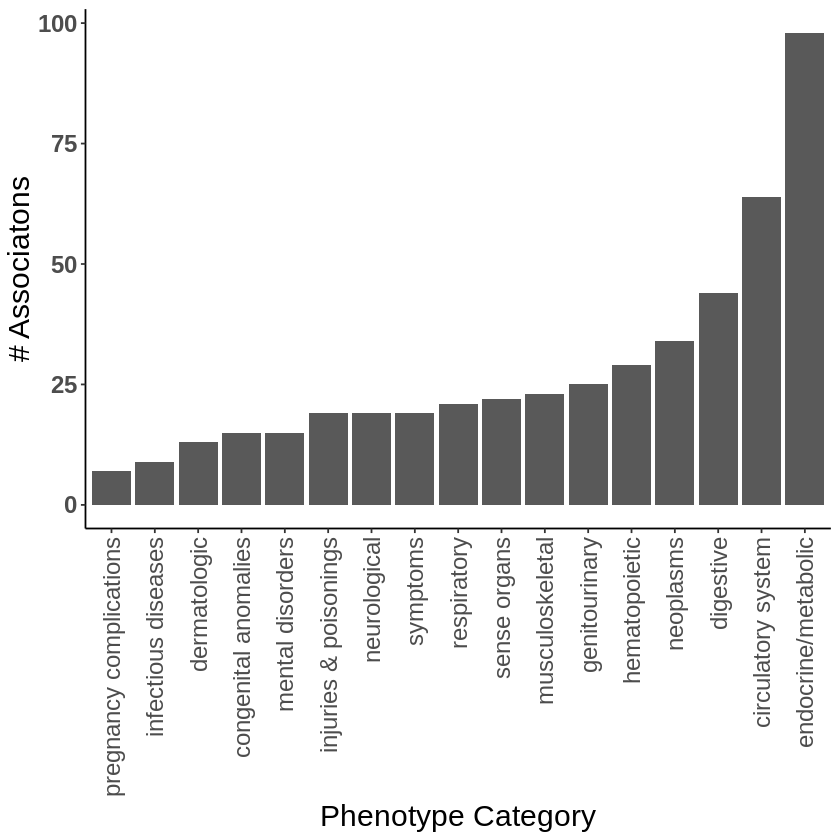

In [2]:
#top_genes <- "../altai_dr_phewas.txt"
top_genes <- "~/Dropbox (VU Basic Sciences)/predixcan/altai_temp/all_dr_phewas.txt"
full_assoc_nean <- read_delim(top_genes, "\t", escape_double = FALSE, trim_ws = TRUE)
data(pheinfo)
full_assoc_nean$group <- "none"
full_assoc_nean <- full_assoc_nean[((full_assoc_nean$`p-value` < 0.00001) & (full_assoc_nean$`no of cases` > 30)),]

## if filtering by introgression status of genes:
intro_genes <- read_csv("../data/altai_intro_genes_names.txt")
intro_genes$gene <- intro_genes$`#names`
intro_genes$`#names` <- NULL

# get introgressed genes
#full_assoc_nean <- inner_join(full_assoc_nean, intro_genes)

# get non-Introgressed genes
full_assoc_nean <- anti_join(full_assoc_nean, intro_genes)

for (row in 1:nrow(pheinfo)) {
    phecode <- pheinfo$phecode[row]
    if (startsWith(phecode, "00")) {phecode <- substr(phecode,3,nchar(phecode))}
    if (startsWith(phecode, "0")) {phecode <- substr(phecode,2,nchar(phecode))}
    if (paste("X",phecode,sep="") %in% full_assoc_nean$phecode) {
      full_assoc_nean[full_assoc_nean$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
}
full_assoc_nean$sum <- 1
counts <- full_assoc_nean %>% group_by(group) %>% summarise(sum = sum(sum))
counts$t_sum <- 0
for (row in 1:nrow(counts)) {
    counts$t_sum[row] <- nrow(pheinfo[pheinfo$group == counts$group[row],])
}
counts$prop <- counts$sum/counts$t_sum
ggplot(counts,aes(x=reorder(group,sum),y=sum)) + ylab("# Associatons") + xlab("Phenotype Category") + theme_classic() + 
theme(legend.position = "none",text = element_text(size=18),axis.text.x = element_text(angle = 90,vjust=0.5,
           hjust=1),axis.text.y = element_text(face = "bold")) + geom_bar(stat="identity")
ggsave('../phewas_counts.pdf', width=6, height= 6) 

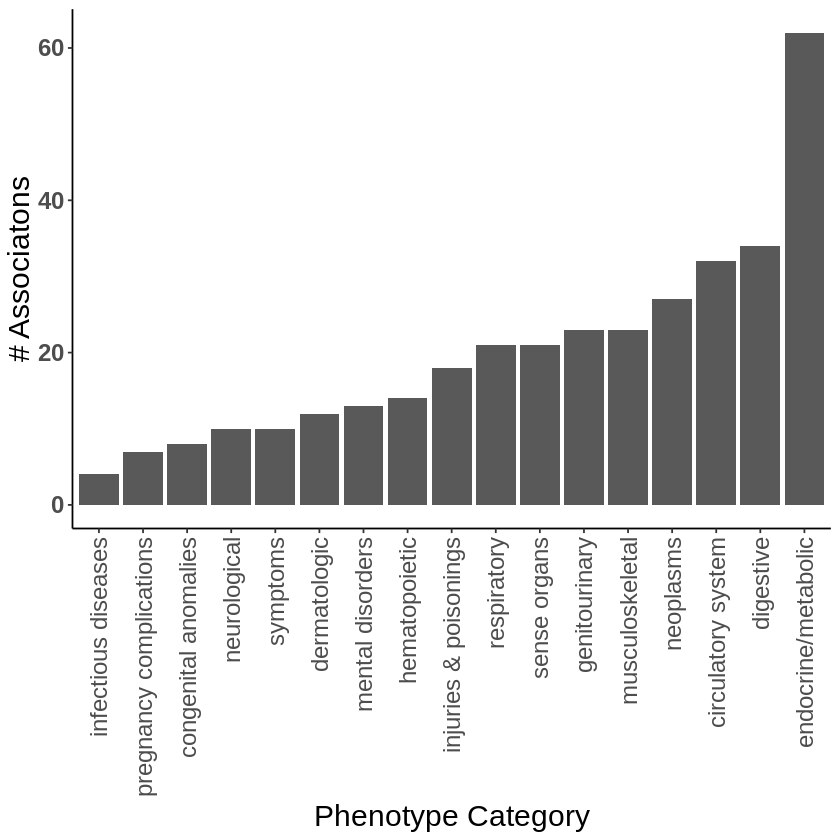

In [8]:
#run after previous cell, adding filtering out tissues
filt_nean <- full_assoc_nean %>% group_by(phecode,gene,trait,group,sum) %>% summarize(pvalue=min(`p-value`))
counts <- filt_nean %>% group_by(group) %>% summarise(sum = sum(sum))
counts$t_sum <- 0
for (row in 1:nrow(counts)) {
    counts$t_sum[row] <- nrow(pheinfo[pheinfo$group == counts$group[row],])
}
counts$prop <- counts$sum/counts$t_sum
ggplot(counts,aes(x=reorder(group,sum),y=sum)) + ylab("# Associatons") + xlab("Phenotype Category") + theme_classic() + 
theme(legend.position = "none",text = element_text(size=18),axis.text.x = element_text(angle = 90,vjust=0.5,
           hjust=1),axis.text.y = element_text(face = "bold")) + geom_bar(stat="identity")
ggsave('../phewas_counts_uniqueAssoc.pdf', width=6, height= 6) 

***
[Contents](#Contents)

<a id='phenoor'></a>
#### Odds Ratios for DR genes being associated with a particular phenotype group

Parsed with column specification:
cols(
  tissue = col_character(),
  phecode = col_character(),
  beta = col_double(),
  `p-value` = col_double(),
  gene = col_character(),
  trait = col_character(),
  r2 = col_double(),
  OR = col_double(),
  `no of cases` = col_integer(),
  `no of controls` = col_integer()
)
Parsed with column specification:
cols(
  tissue = col_character(),
  phecode = col_character(),
  beta = col_double(),
  `p-value` = col_double(),
  gene = col_character(),
  trait = col_character(),
  r2 = col_double(),
  OR = col_double(),
  `no of cases` = col_integer(),
  `no of controls` = col_integer()
)
Parsed with column specification:
cols(
  `#names` = col_character()
)
Joining, by = "gene"
Joining, by = "gene"
Warning message in (full_control$`p-value` < 1e-05) & (full_assoc_nean$`no of cases` > :
“longer object length is not a multiple of shorter object length”



|phenotypes              |        ors|    pvalue|        low|       high|
|:-----------------------|----------:|---------:|----------:|----------:|
|endocrine/metabolic     | -0.6210562| 0.0000000| -0.8529054| -0.3892070|
|congenital anomalies    |  0.6131705| 0.0466752|  0.0465170|  1.1798241|
|symptoms                |  0.8582020| 0.0024080|  0.3412378|  1.3751661|
|circulatory system      |  0.8985373| 0.0000000|  0.6042865|  1.1927881|
|neoplasms               |  0.1737011| 0.3645706| -0.1985627|  0.5459650|
|neurological            | -0.1115362| 0.7235035| -0.5945563|  0.3714839|
|injuries & poisonings   |  0.1400218| 0.5987647| -0.3490915|  0.6291352|
|mental disorders        |  0.2550131| 0.3539938| -0.2969182|  0.8069444|
|hematopoietic           |  0.5339508| 0.0167195|  0.1236141|  0.9442874|
|musculoskeletal         | -0.2504058| 0.3063056| -0.6889005|  0.1880889|
|digestive               |  0.3216103| 0.0597908| -0.0119423|  0.6551628|
|genitourinary           | -0.217994

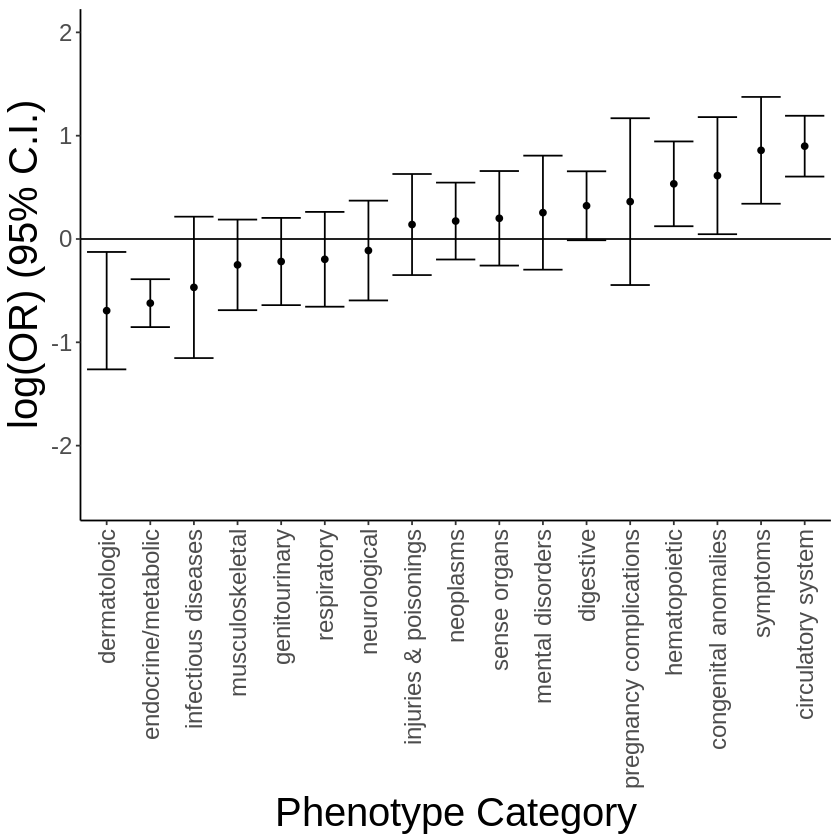

In [9]:
#top_genes <- "../altai_dr_phewas.txt"
top_genes <- "~/Dropbox (VU Basic Sciences)/predixcan/altai_temp/all_dr_phewas.txt"
#control <- "../nonIntro_nonDR_Allgenes_phewas.txt"
control <- "~/Dropbox (VU Basic Sciences)/predixcan/altai_temp/control_phewas.txt"

data(pheinfo)
full_assoc_nean <- read_delim(top_genes, "\t", escape_double = FALSE, trim_ws = TRUE)
full_control <- read_delim(control, "\t", escape_double = FALSE, trim_ws = TRUE)

## if filtering by introgression status of genes:
intro_genes <- read_csv("../data/altai_intro_genes_names.txt")
intro_genes$gene <- intro_genes$`#names`
intro_genes$`#names` <- NULL

# get introgressed genes
#full_assoc_nean <- inner_join(full_assoc_nean, intro_genes)
#full_control <- inner_join(full_control, intro_genes)
# get non-Introgressed genes
full_assoc_nean <- anti_join(full_assoc_nean, intro_genes)
full_control <- anti_join(full_control, intro_genes)

full_assoc_nean$group <- "none"
full_assoc_nean <- full_assoc_nean[((full_assoc_nean$`p-value` < 0.00001) & (full_assoc_nean$`no of cases` > 30)),]
full_control$group <- "none"
full_control <- full_control[((full_control$`p-value` < 0.00001) & (full_assoc_nean$`no of cases` > 30)),]
for (row in 1:nrow(pheinfo)) {
    phecode <- pheinfo$phecode[row]
    if (startsWith(phecode, "00")) {phecode <- substr(phecode,3,nchar(phecode))}
    if (startsWith(phecode, "0")) {phecode <- substr(phecode,2,nchar(phecode))}
    if (paste("X",phecode,sep="") %in% full_control$phecode) {
      full_control[full_control$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
    if (paste("X",phecode,sep="") %in% full_assoc_nean$phecode) {
      full_assoc_nean[full_assoc_nean$phecode == paste("X",phecode,sep=""),]$group <- pheinfo$group[row]
    }
}
ORs <- data.frame(phenotypes = unique(full_assoc_nean$group), ors = 0)
for (row in 1:nrow(ORs)) {
    phen_nean <- nrow(full_assoc_nean[full_assoc_nean$group == ORs$phenotypes[row],])
    phen_control <- nrow(full_control[full_control$group == ORs$phenotypes[row],])
    norm_nean <- nrow(full_assoc_nean[full_assoc_nean$group != ORs$phenotypes[row],])
    norm_control <- nrow(full_control[full_control$group != ORs$phenotypes[row],])
    ORs$ors[row] <- log(fisher.test(matrix(c(phen_nean,phen_control,norm_nean,norm_control),nrow=2))$estimate)
    ORs$pvalue[row] <- fisher.test(matrix(c(phen_nean,phen_control,norm_nean,norm_control),nrow=2))$p.value
    ORs$low[row] <- ORs$ors[row]-1.96*sqrt((1/phen_nean)+(1/phen_control)+(1/norm_nean)+(1/norm_control))
    ORs$high[row] <- ORs$ors[row]+1.96*sqrt((1/phen_nean)+(1/phen_control)+(1/norm_nean)+(1/norm_control))
}
ggplot(ORs,aes(x=reorder(phenotypes,ors),y=ors)) + geom_point() + theme_classic() +
    theme(text = element_text(size=18),axis.title.x= element_text(size = 24),axis.text.x=element_text(angle = 90,vjust = 0.5,hjust=1),axis.title.y=element_text(size = 24)) + geom_errorbar(aes(ymin = low,ymax = high)) + 
    geom_hline(yintercept=0,color = "black")+ xlab("Phenotype Category") + ylab("log(OR) (95% C.I.)") +ylim(-2.5,2)
ggsave('../phewas_ors.pdf', width=6, height= 6) 
kable(ORs)



|phenotypes              |        ors|    pvalue|        low|      high|
|:-----------------------|----------:|---------:|----------:|---------:|
|infectious diseases     | -0.8531262| 0.0982347| -1.8679884| 0.1617359|
|neoplasms               |  0.0312353| 0.9137836| -0.3884890| 0.4509596|
|endocrine/metabolic     | -0.0367937| 0.8821588| -0.3298833| 0.2562959|
|hematopoietic           | -0.1061051| 0.8889213| -0.6731436| 0.4609334|
|mental disorders        |  0.2515751| 0.4035164| -0.3485092| 0.8516594|
|neurological            | -0.5763768| 0.0812868| -1.2301909| 0.0774372|
|sense organs            |  0.1431127| 0.5267247| -0.3313329| 0.6175583|
|circulatory system      |  0.2116141| 0.2857910| -0.1808597| 0.6040879|
|respiratory             |  0.1353092| 0.5293325| -0.3389165| 0.6095350|
|digestive               |  0.2899736| 0.1356095| -0.0937722| 0.6737193|
|genitourinary           | -0.1473918| 0.5867717| -0.5953375| 0.3005539|
|pregnancy complications |  0.2321803| 0.5051070|

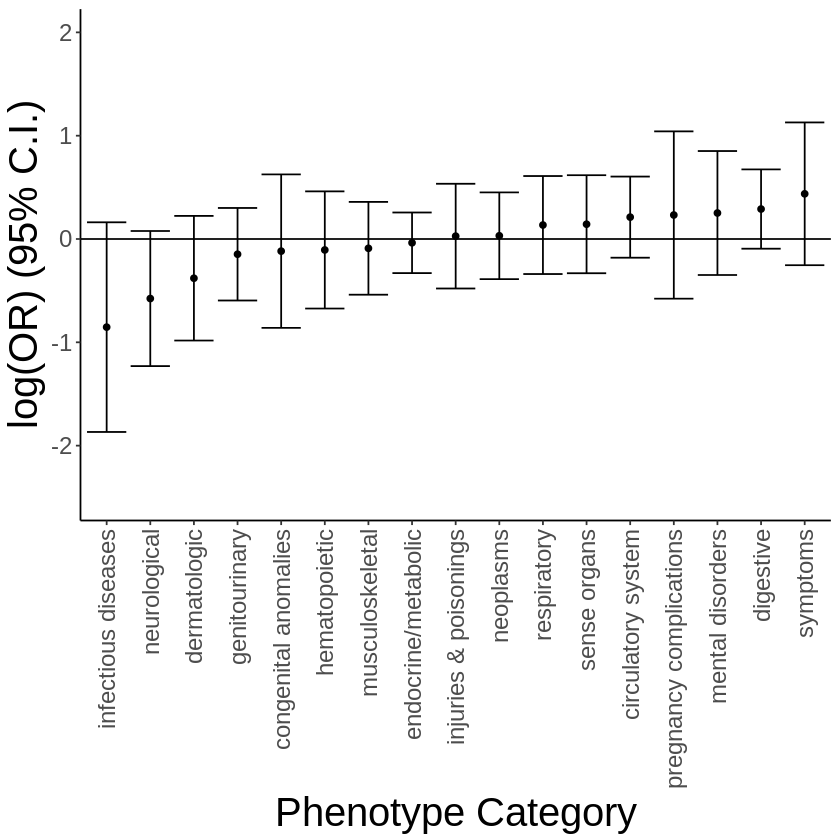

In [11]:
# run after previous, add filtering for unique associations
filt_nean <- full_assoc_nean %>% group_by(phecode,gene,trait,group) %>% summarize(pvalue=min(`p-value`))
filt_control <- full_control %>% group_by(phecode,gene,trait,group) %>% summarize(pvalue=min(`p-value`))

ORs <- data.frame(phenotypes = unique(filt_nean$group), ors = 0)
for (row in 1:nrow(ORs)) {
    phen_nean <- nrow(filt_nean[filt_nean$group == ORs$phenotypes[row],])
    phen_control <- nrow(filt_control[filt_control$group == ORs$phenotypes[row],])
    norm_nean <- nrow(filt_nean[filt_nean$group != ORs$phenotypes[row],])
    norm_control <- nrow(filt_control[filt_control$group != ORs$phenotypes[row],])
    ORs$ors[row] <- log(fisher.test(matrix(c(phen_nean,phen_control,norm_nean,norm_control),nrow=2))$estimate)
    ORs$pvalue[row] <- fisher.test(matrix(c(phen_nean,phen_control,norm_nean,norm_control),nrow=2))$p.value
    ORs$low[row] <- ORs$ors[row]-1.96*sqrt((1/phen_nean)+(1/phen_control)+(1/norm_nean)+(1/norm_control))
    ORs$high[row] <- ORs$ors[row]+1.96*sqrt((1/phen_nean)+(1/phen_control)+(1/norm_nean)+(1/norm_control))
}
ggplot(ORs,aes(x=reorder(phenotypes,ors),y=ors)) + geom_point() + theme_classic() +
    theme(text = element_text(size=18),axis.title.x= element_text(size = 24),axis.text.x=element_text(angle = 90,vjust = 0.5,hjust=1),axis.title.y=element_text(size = 24)) + geom_errorbar(aes(ymin = low,ymax = high)) + 
    geom_hline(yintercept=0,color = "black")+ xlab("Phenotype Category") + ylab("log(OR) (95% C.I.)") +ylim(-2.5,2)
ggsave('../phewas_ors_uniqueAssoc.pdf', width=6, height= 6) 
kable(ORs)

In [10]:
kable(full_assoc_nean[order(full_assoc_nean$`p-value`),])



|tissue                                |phecode |         beta| p-value|gene      |trait                                                                                 |        r2|       OR| no of cases| no of controls|group                   |
|:-------------------------------------|:-------|------------:|-------:|:---------|:-------------------------------------------------------------------------------------|---------:|--------:|-----------:|--------------:|:-----------------------|
|Skin_Not_Sun_Exposed_Suprapubic       |X200.1  | -1.42267e+17| 0.0e+00|IDO1      |Polycythemia vera                                                                     | 0.0185707| 0.000000|         103|          18835|neoplasms               |
|Brain_Putamen_basal_ganglia           |X200.1  |  5.50398e+16| 0.0e+00|LETM2     |Polycythemia vera                                                                     | 0.0545902| 0.000000|         103|          18835|neoplasms               |
|Skin_Not_Sun_

***
[Contents](#Contents)

<a id='dersnpcount'></a>
#### Counts of Derived SNPs

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  `#gene` = col_character(),
  snp_count = col_integer()
)
Warning message:
“Unknown or uninitialised column: '#gene'.”Warning message:
“Unknown or uninitialised column: '#gene'.”

[1] 179.7807

[1] 141.9139

[1] 144.3651

[1] 9.23779e-19

[1] 1.02252e-15

Warning message:
“Removed 28 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 28 rows containing non-finite values (stat_boxplot).”

Warning message:
“Removed 28 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 28 rows containing non-finite values (stat_boxplot).”

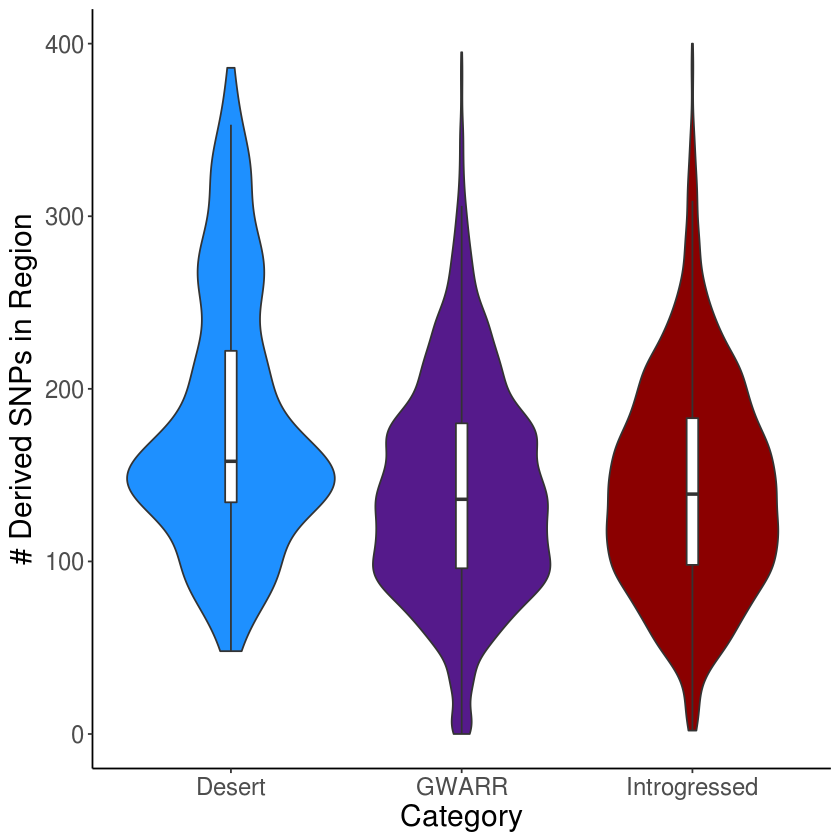

In [5]:
der_file <- "../data/gene-dersnp_intersection.txt"
desert_file <- "../data/altai_desert_genes.txt"
intro_file <- "../data/altai_intro_genes.txt"
excl_file <- "../data/altai_original_missingModels.txt"

excl_genes <- read_delim(excl_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
desert_genes <- read_delim(desert_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
intro_genes <- read_delim(intro_file,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
der_snps <- read_delim(der_file,"\t", escape_double = FALSE, col_names = TRUE, trim_ws = TRUE)

for (i in 1:nrow(desert_genes)) {
    desert_genes$`#gene`[i] <- strsplit(desert_genes$X1[i],"\\.")[[1]][1]
}
for (i in 1:nrow(intro_genes)) {
    intro_genes$`#gene`[i] <- strsplit(intro_genes$X1[i],"\\.")[[1]][1]
}
for (i in 1:nrow(excl_genes)) {
    excl_genes[i,1] <- strsplit(excl_genes[i,1][[1]],"[.]")[[1]][1]
}
excl_genes$`#gene` <- excl_genes$X1
excl_genes$X1 <- NULL
der_snps$Category <- "GWARR"
for (i in 1:nrow(der_snps)){
    if (der_snps$`#gene`[i] %in% intro_genes$`#gene`) {
        der_snps$Category[i] <- "Introgressed"
    }else {if(der_snps$`#gene`[i] %in% desert_genes$`#gene`) {
        der_snps$Category[i] <- "Desert"
    }}
}
#der_snps <- anti_join(der_snps,excl_genes)

mean(der_snps[der_snps$Category == "Desert",]$snp_count)
mean(der_snps[der_snps$Category == "GWARR",]$snp_count)
mean(der_snps[der_snps$Category == "Introgressed",]$snp_count)
wilcox.test(der_snps[der_snps$Category == "Desert",]$snp_count,der_snps[der_snps$Category == "GWARR",]$snp_count)$p.value
wilcox.test(der_snps[der_snps$Category == "Desert",]$snp_count,der_snps[der_snps$Category == "Introgressed",]$snp_count)$p.value

ggplot(der_snps,aes(x=Category,y=snp_count,fill=Category)) + geom_violin()+
  geom_boxplot(width=0.05,fill="white",outlier.shape=NA) +theme_classic() + scale_fill_manual(values=c("dodgerblue","purple4","darkred"))+
labs(y="# Derived SNPs in Region") +theme(text = element_text(size=18),legend.position = "none")+ylim(0,400)#considering everything > 400 outlier
ggsave('der_snps.pdf', width=6, height= 4) 

***
[Contents](#Contents)

<a id='goplot'></a>
#### Plot GO associations

Parsed with column specification:
cols(
  geneset = col_character(),
  description = col_character(),
  link = col_character(),
  C = col_integer(),
  O = col_integer(),
  E = col_double(),
  R = col_double(),
  PValue = col_double(),
  FDR = col_double(),
  overlapGene = col_character(),
  OverlapGene_UserID = col_character()
)


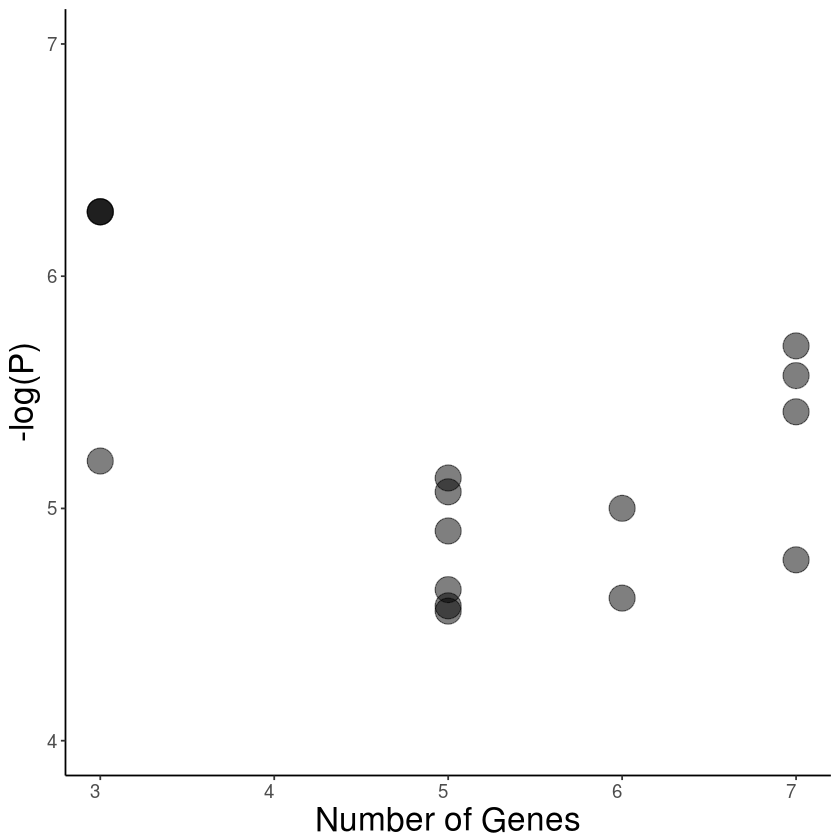

In [30]:
enr_file <- "species_diff_GO/altVindenrichment_results.txt"

enrichments <- read_delim(enr_file,"\t", escape_double = FALSE, col_names = TRUE, trim_ws = TRUE)
enrichments$logp <- log(enrichments$PValue,base=10)
ggplot(enrichments[enrichments$FDR < 0.05,],aes(x=O,y=-logp)) + geom_point(alpha=0.5,size=7) + theme_classic() + 
labs(x="Number of Genes",y="-log(P)") + theme(text = element_text(size=14),axis.title.x= element_text(size = 20),
                axis.text.x=element_text(vjust = 0.5, hjust=1),axis.title.y=element_text(size = 20))+ylim(4,7)
ggsave('GO_plot.pdf', width=6, height= 4) 

In [8]:
enrichments[enrichments$FDR < 0.1,]

geneset,description,link,C,O,E,R,PValue,FDR,overlapGene,OverlapGene_UserID,logp
umls:C0033578,Prostatic Neoplasms,http://www.disgenet.org/web/DisGeNET/menu/umls:C0033578,57,39,25.862302,1.507986,0.000246151,0.04356878,1012;10207;10397;10417;10451;11005;11187;150084;1509;1636;1775;207;2272;23635;2886;3091;3169;3292;3490;3728;373156;3732;3915;4023;4507;4585;463;472;4883;51655;54790;55829;6293;6462;6817;7079;7164;7421;8000,ENSG00000140945;ENSG00000132849;ENSG00000104419;ENSG00000159674;ENSG00000134215;ENSG00000133710;ENSG00000184363;ENSG00000183067;ENSG00000117984;ENSG00000159640;ENSG00000167968;ENSG00000142208;ENSG00000189283;ENSG00000145687;ENSG00000141738;ENSG00000100644;ENSG00000129514;ENSG00000108786;ENSG00000163453;ENSG00000173801;ENSG00000197448;ENSG00000085117;ENSG00000135862;ENSG00000175445;ENSG00000099810;ENSG00000145113;ENSG00000140836;ENSG00000149311;ENSG00000113389;ENSG00000108551;ENSG00000168769;ENSG00000131871;ENSG00000223501;ENSG00000129214;ENSG00000196502;ENSG00000157150;ENSG00000111907;ENSG00000111424;ENSG00000167653,-3.608798
umls:C0027051,Myocardial Infarction,http://www.disgenet.org/web/DisGeNET/menu/umls:C0027051,13,12,5.898420,2.034443,0.000531378,0.04702695,1636;1952;2056;2147;2730;3816;3957;4049;4313;472;5581;7056,ENSG00000159640;ENSG00000143126;ENSG00000130427;ENSG00000180210;ENSG00000023909;ENSG00000167748;ENSG00000100079;ENSG00000226979;ENSG00000087245;ENSG00000149311;ENSG00000171132;ENSG00000178726,-3.274596
umls:C0021368,Inflammation,http://www.disgenet.org/web/DisGeNET/menu/umls:C0021368,12,11,5.444695,2.020315,0.001101928,0.06118803,10544;2056;207;2588;3146;3552;3620;4313;4982;55829;623,ENSG00000101000;ENSG00000130427;ENSG00000142208;ENSG00000141012;ENSG00000189403;ENSG00000115008;ENSG00000131203;ENSG00000087245;ENSG00000164761;ENSG00000131871;ENSG00000100739,-2.957847
umls:C0025202,melanoma,http://www.disgenet.org/web/DisGeNET/menu/umls:C0025202,20,16,9.074492,1.763184,0.001533527,0.06118803,10397;10743;2056;23512;3371;4507;472;5443;54663;54790;55862;57700;5909;6850;80723;83638,ENSG00000104419;ENSG00000108557;ENSG00000130427;ENSG00000178691;ENSG00000041982;ENSG00000099810;ENSG00000149311;ENSG00000115138;ENSG00000133316;ENSG00000168769;ENSG00000093144;ENSG00000151553;ENSG00000076864;ENSG00000165025;ENSG00000168917;ENSG00000175573,-2.814309
umls:C0006663,Calcinosis,http://www.disgenet.org/web/DisGeNET/menu/umls:C0006663,8,8,3.629797,2.203980,0.001728475,0.06118803,2056;2209;249;29108;4313;5155;5443;80781,ENSG00000130427;ENSG00000150337;ENSG00000162551;ENSG00000103490;ENSG00000087245;ENSG00000100311;ENSG00000115138;ENSG00000182871,-2.762337


Parsed with column specification:
cols(
  geneset = col_character(),
  description = col_character(),
  link = col_character(),
  C = col_integer(),
  O = col_integer(),
  E = col_double(),
  R = col_double(),
  PValue = col_double(),
  FDR = col_double(),
  overlapGene = col_character(),
  OverlapGene_UserID = col_character()
)


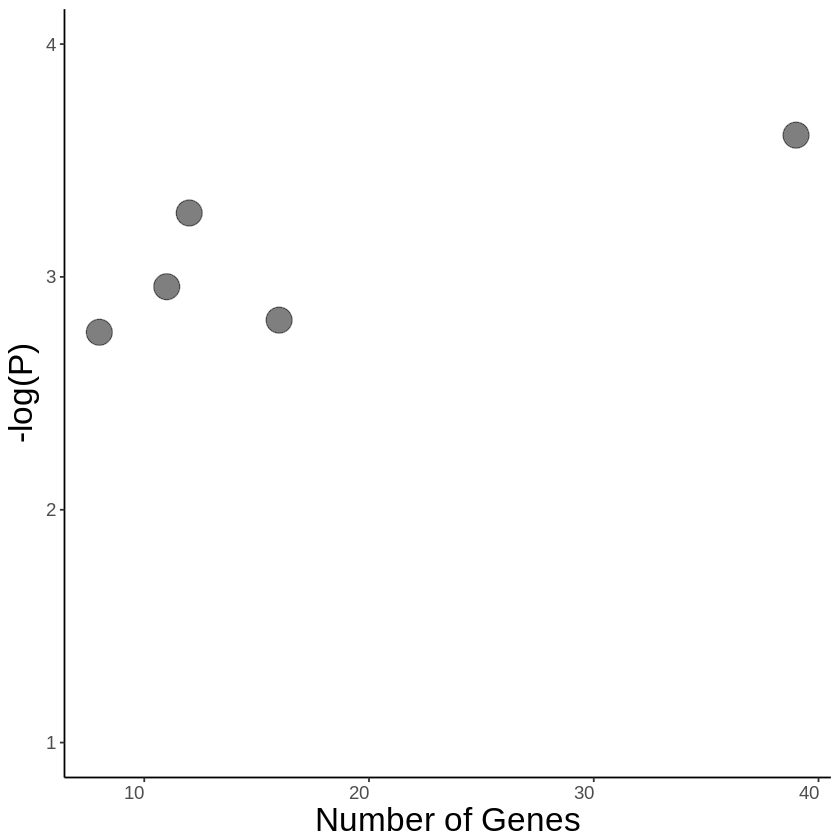

In [11]:
enr_file <- "../altai_drgwarrVSdrIntro.txt"

enrichments <- read_delim(enr_file,"\t", escape_double = FALSE, col_names = TRUE, trim_ws = TRUE)
enrichments$logp <- log(enrichments$PValue,base=10)
ggplot(enrichments[enrichments$FDR < 0.1,],aes(x=O,y=-logp)) + geom_point(alpha=0.5,size=7) + theme_classic() + 
labs(x="Number of Genes",y="-log(P)") + theme(text = element_text(size=14),axis.title.x= element_text(size = 20),
                axis.text.x=element_text(vjust = 0.5, hjust=1),axis.title.y=element_text(size = 20))+ylim(1,4)
ggsave('../disgenet_plot.pdf', width=6, height= 4) 

***
[Contents](#Contents)

<a id='desertplot'></a>
#### Plot Desert Genes on chromosomes

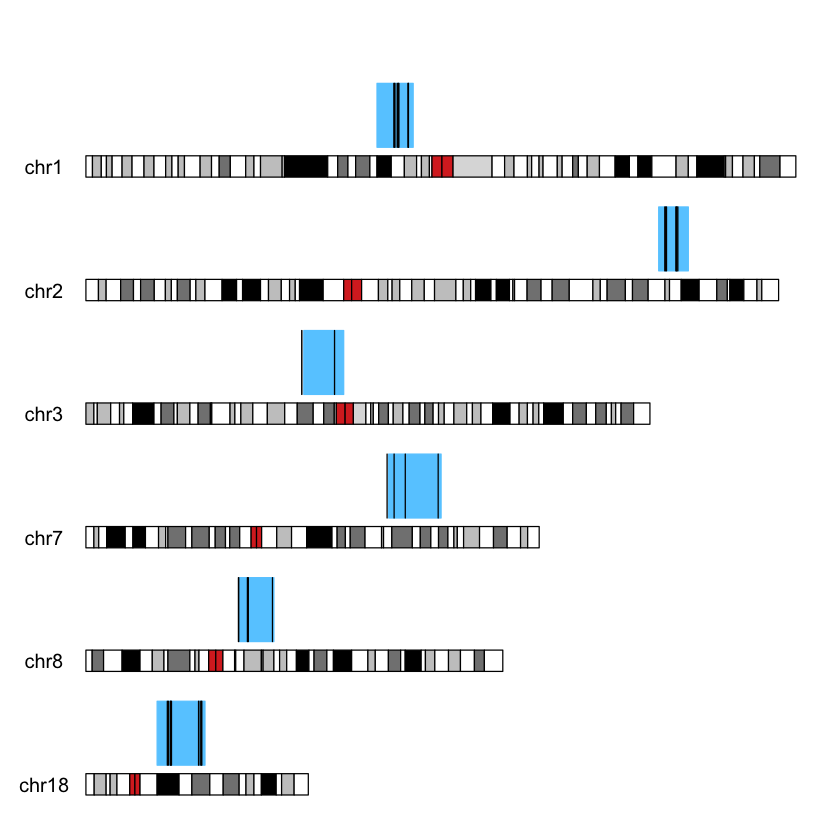

In [5]:
gene_file <- "~/Dropbox (VU Basic Sciences)/predixcan/results/introgression/desert_dr_genes.bed"
deserts <- "~/Dropbox (VU Basic Sciences)/predixcan/data/nean_deserts.bed"

dr_genes <- read.delim(gene_file, header=FALSE, stringsAsFactors=FALSE)
des <- read.delim(deserts, header=FALSE, stringsAsFactors=FALSE,comment.char = "#")
for (i in 1:nrow(dr_genes)){
    dr_genes$V1[i] <- paste("chr",dr_genes$V1[i],sep="")
}
for (i in 1:nrow(des)){
    des$V1[i] <- paste("chr",des$V1[i],sep="")
}

#chrms <- unique(dr_genes$V1))
chrms <- c("chr1","chr2","chr3","chr7","chr8","chr18")
genes <- makeGRangesFromDataFrame(data_frame(chr = dr_genes$V1, start=dr_genes$V2,end=dr_genes$V3))
deserts <- makeGRangesFromDataFrame(data_frame(chr = des$V1, start=des$V2,end=des$V3))
values(genes) <- DataFrame(names=c("ZDBF2","PIK3C3","VAV3","RB1CC1","CHMP2B","PSRC1","GAREM1","RIT2","STXBP3","BMPR2","ZNF717","THAP5","ADAM23","CELSR2","DSG3","TGS1","SYPL1","ST7L","TMEM229A","CPO","MOV10","CARF","LSMEM1","BHLHE22","MOS","RNF138","DSC3"))

kp <-plotKaryotype(genome="hg19", chromosomes=chrms)
kpPlotRegions(kp, deserts, col="#66ccff",r1=0.75)
kpPlotRegions(kp, data=genes,r1=0.75)
#dev.copy(pdf,"desert_genes.pdf",width = 10, height = 3)
#dev.off()

***
[Contents](#Contents)

<a id='1kgdist'></a>
#### plot greyscale 1kG distribution of a gene

HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00105,HG00106,HG00107,⋯,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
-0.1158433,0.302823,0.3757591,0.08553885,0.2056745,0.188417,0.01127621,-0.1108257,-0.2011438,0.2519836,⋯,0.03646282,0.3422601,-0.06431296,0.2118796,-0.03859374,-0.003597486,0.1266167,-0.1021731,0.03283709,-0.03481613


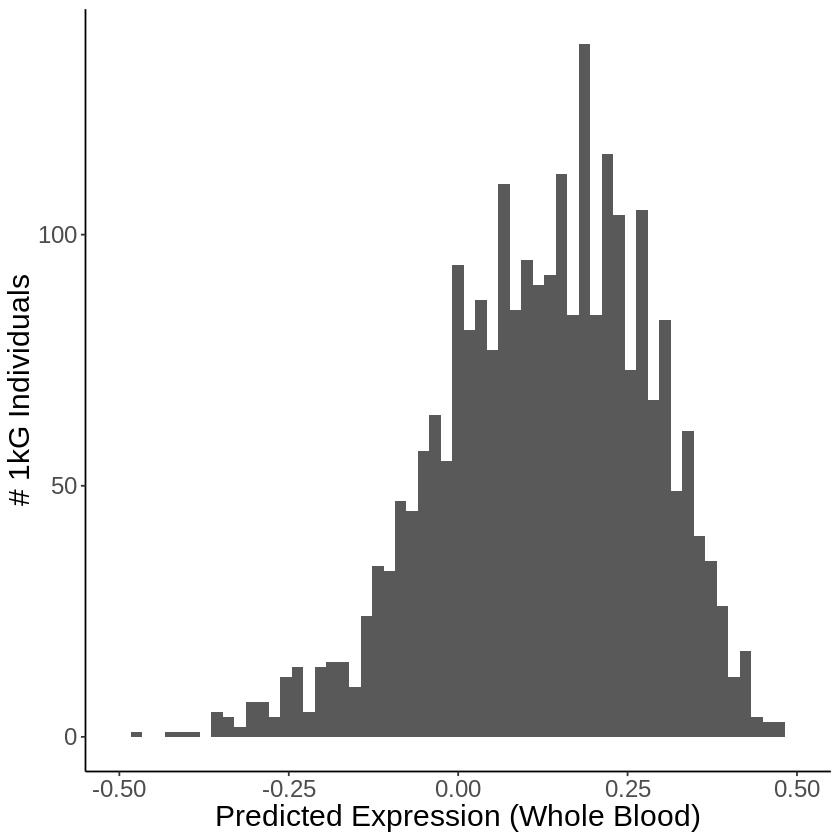

In [35]:
dist_path <- "~/Dropbox (VU Basic Sciences)/predixcan/results/exp_dist_1kG/vdr_wholeblood.txt"
#dist_path <- "../cyp11a1_adiposeVO_dist.txt"

dist <- read.delim(dist_path,header =T, comment.char = '#')
dist$gene <- NULL
dist
dist <- as.data.frame(t(dist))

ggplot(dist,aes(V1)) + geom_histogram(bins = 60) + xlab("Predicted Expression (Whole Blood)") + ylab("# 1kG Individuals") + theme_classic() +
  theme(text = element_text(size=18),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18)) +xlim(-0.5,0.5)
ggsave("../vdr_wb.pdf",width=5, height=4)

Joining, by = "X.Individual.ID"
Warning message:
“Column `X.Individual.ID` joining character vector and factor, coercing into character vector”

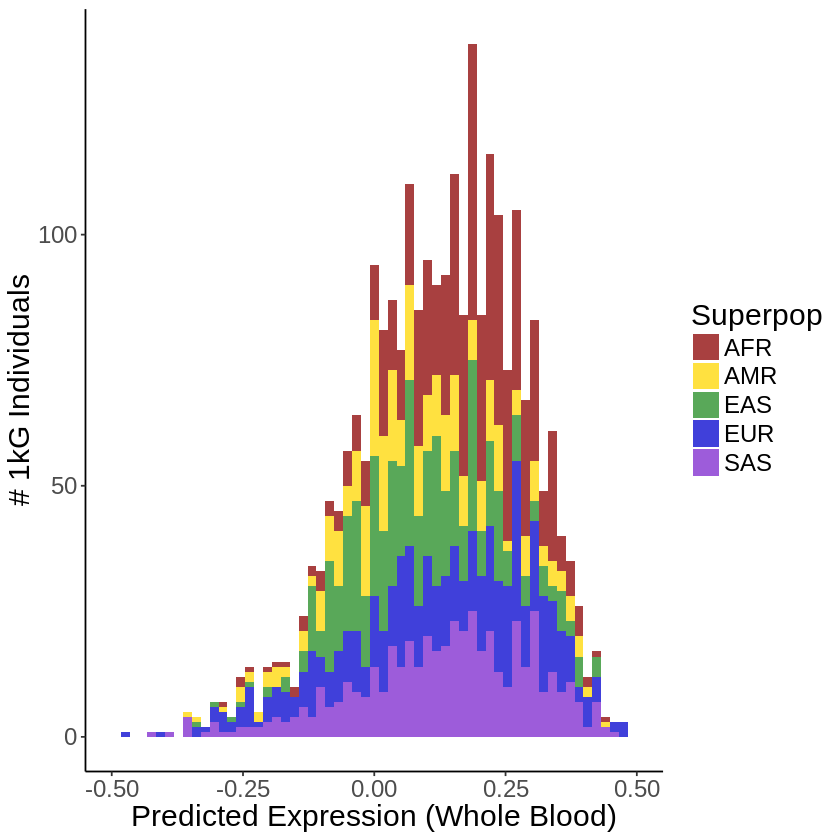

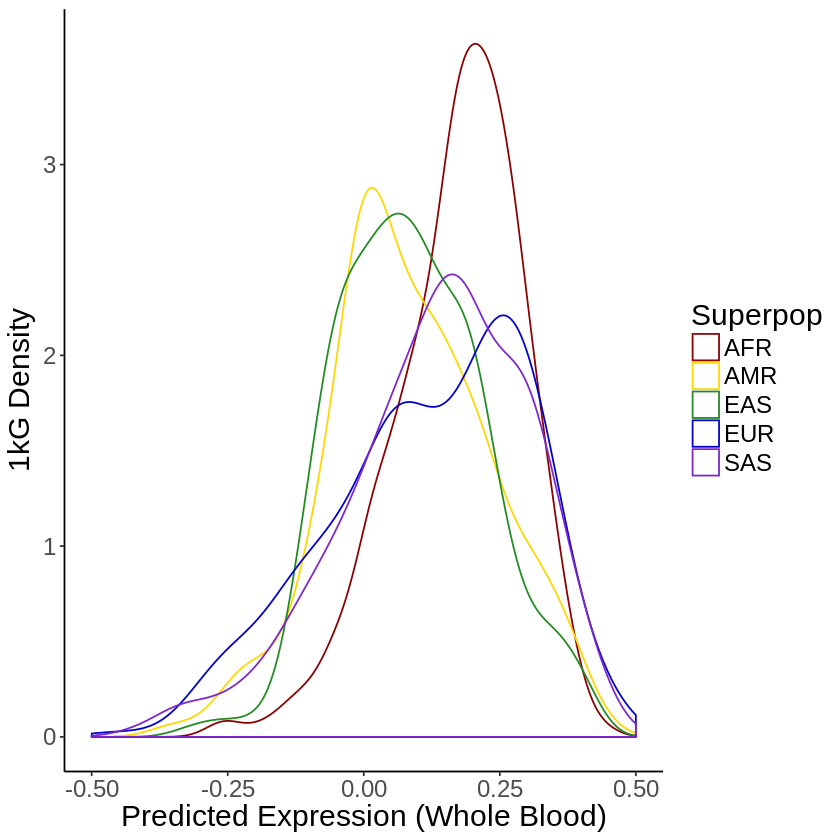

In [36]:
dist_path <- "~/Dropbox (VU Basic Sciences)/predixcan/results/exp_dist_1kG/vdr_wholeblood.txt"
id_path <- "~/Dropbox (VU Basic Sciences)/predixcan/data/1kG_SuperPop_IDs.txt"

dist <- read.delim(dist_path,header =T)
dist$gene<- NULL
dist <- tibble::rownames_to_column(as.data.frame(t(dist)), "X.Individual.ID")

pop_ids <- read.delim(id_path,header =T)
dist <- inner_join(dist,pop_ids)

ggplot(dist,aes(V1)) + geom_histogram(bins = 60,aes(fill=Superpop),alpha=0.75) + xlab("Predicted Expression (Whole Blood)") + ylab("# 1kG Individuals") +
  theme_classic() + scale_fill_manual(values=c("darkred","gold","forestgreen","mediumblue","purple3")) +
  theme(text = element_text(size=18),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18)) +xlim(-0.5,0.5)
ggsave("../vdr_wb_pops_stacked.pdf",width=5, height=4)
#ggplot(dist,aes(V1)) + geom_histogram(bins = 60,aes(fill=Superpop),alpha=0.5,position = 'identity') + xlab("Predicted Expression (Tibial Artery)") + ylab("# 1kG Individuals") +
#  theme_classic() + scale_fill_manual(values=c("darkred","gold","forestgreen","mediumblue","purple3")) +
#  theme(text = element_text(size=18),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18)) +xlim(-0.5,0.5)
#ggsave("dist_wholeblood_pops_overlap.pdf",width=5, height=4)
ggplot(dist) +
  geom_density(aes(x=V1,colour=Superpop)) + xlab("Predicted Expression (Whole Blood)") + ylab("1kG Density") +
  theme_classic() + scale_colour_manual(values=c("darkred","gold","forestgreen","mediumblue","purple3")) +
  theme(text = element_text(size=18),axis.title.x= element_text(size = 18),axis.title.y=element_text(size = 18)) +xlim(-0.5,0.5)
ggsave("../vdr_wb_pops_density.pdf",width=5, height=4)

***
[Contents](#Contents)

<a id='neancorr'></a>
#### predicted expression correlations between Altai genomes

In [49]:
original_path <- "data/altai_original_predExp.txt"
update_path <- "data/altai_update_predExp.txt"
excl1_path <- "data/altai_original_missingModels.txt"
excl2_path <- "data/altai_update_missingModels.txt"

orig_mat <- read_delim(original_path, "\t", escape_double = FALSE, trim_ws = TRUE)
upd_mat <- read_delim(update_path, "\t", escape_double = FALSE, trim_ws = TRUE)
excl1 <- read_delim(excl1_path,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)
excl2 <- read_delim(excl2_path,"\t", escape_double = FALSE, col_names = FALSE, trim_ws = TRUE)

excl1$gene_id <- excl1$X1
excl1$X1 <- NULL
excl2$gene_id <- excl2$X1
excl2$X1 <- NULL

orig_mat <- anti_join(anti_join(orig_mat,excl1),excl2)
upd_mat <- anti_join(anti_join(upd_mat,excl1),excl2)
out <- DataFrame(tissue = rep("nil",ncol(orig_mat)-1))
for (i in 2:ncol(orig_mat)) {
    out$tissue[i-1] <- names(orig_mat)[i]
    out$rho[i-1] <- cor.test(orig_mat[,i][[1]],upd_mat[,i][[1]],method = "spearman")$estimate
    out$p[i-1] <- cor.test(orig_mat[,i][[1]],upd_mat[,i][[1]],method = "spearman")$p.value
}
mean(out$rho)
kable(out)

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Joining, by = "gene_id"
Joining, by = "gene_id"
Joining, by = "gene_id"
Joining, by = "gene_id"
Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], me

"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(orig_mat[, i][[1]], upd_mat[, i][[1]], method = "spearman"):
"Cannot compute exact p-value with ties"W

[1] 0.8117608



|tissue                                |       rho|  p|
|:-------------------------------------|---------:|--:|
|adipose_subcutaneous                  | 0.8354703|  0|
|esophagus_mucosa                      | 0.8324968|  0|
|adipose_visceral_omentum              | 0.8248803|  0|
|esophagus_muscularis                  | 0.8284796|  0|
|adrenal_gland                         | 0.8113760|  0|
|heart_atrial_appendage                | 0.8045131|  0|
|anterior_cingulate_cortex             | 0.7928536|  0|
|left_ventricle                        | 0.8110262|  0|
|artery_aorta                          | 0.8216417|  0|
|liver                                 | 0.7944327|  0|
|artery_coronary                       | 0.7950425|  0|
|lung                                  | 0.8267054|  0|
|artery_tibial                         | 0.8352358|  0|
|muscle_skeletal                       | 0.8300338|  0|
|brain_caudate_basal_ganglia           | 0.7862996|  0|
|nerve_tibial                          | 0.848

***
[Contents](#Contents)

<a id='tisscorr'></a>
#### correlation between tissue sample size and DR genes

Joining, by = "V1"
Warning message:
“Column `V1` joining factors with different levels, coercing to character vector”Warning message in cor.test.default(dr_genes$count, dr_genes$V2, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  dr_genes$count and dr_genes$V2
S = 1447.8, p-value = 1.272e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8906811 


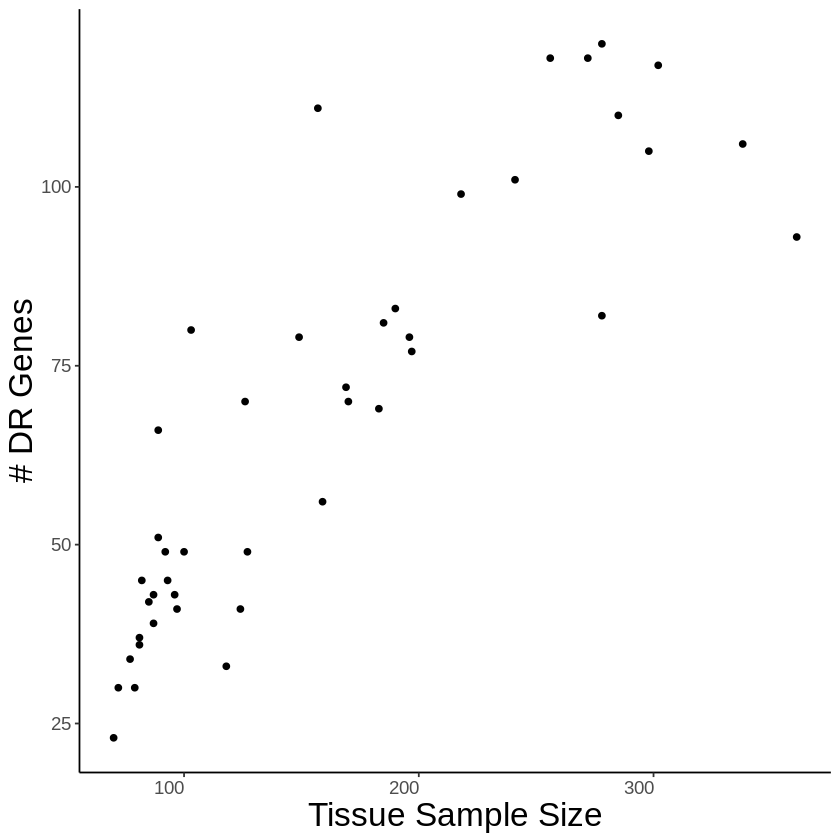

In [3]:
size_path <- "~/Dropbox (VU Basic Sciences)/predixcan/data/gtex_v6_sample_sizes.txt"
dr_path <- "~/Dropbox (VU Basic Sciences)/predixcan/results/altai_1kG_fixed/altai_1kG_fixed_p_values_2sided_tissues_top_genes.txt"

dr_genes <- read.delim(dr_path,header =F)
sample_size <- read.delim(size_path,header=F)

dr_genes$iter <- 1
dr_genes <- dr_genes %>% group_by(V1) %>% summarise(count = sum(iter))
dr_genes <- inner_join(dr_genes,sample_size)

cor.test(dr_genes$count,dr_genes$V2,method = "spearman")

ggplot(dr_genes,aes(x=V2,y=count)) + geom_point() + theme_classic() + 
labs(x="Tissue Sample Size",y="# DR Genes") + theme(text = element_text(size=14),axis.title.x= element_text(size = 20),
                axis.text.x=element_text(vjust = 0.5, hjust=1),axis.title.y=element_text(size = 20))
ggsave('sampleSize_drCount.pdf', width=6, height= 4) 

***
[Contents](#Contents)